In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [14]:

treinamento = pd.read_csv("https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/data/emotions_train.txt", sep=";", names=['Text','Emotion'])
teste = pd.read_csv("https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/data/emotions_test.txt", sep=";", names=['Text','Emotion'])
data = pd.concat([treinamento, teste])

more_data = pd.read_csv("https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/data/more_emotions.csv")
#adiciona os dados de more_data ao dataframe 
#remove os indices que tem emoção = happy ou sadness pq ja tem muito dados d felicidade e d triteza 
more_data = more_data.drop(more_data[(more_data['Emotion'] == "happy") | (more_data['Emotion'] == "sadness")].index)
print(more_data['Emotion'].unique())

data = pd.concat([data, more_data])
data.head()

treinamento, teste = train_test_split(data, test_size=0.3)


['anger' 'love' 'surprise' 'fear']


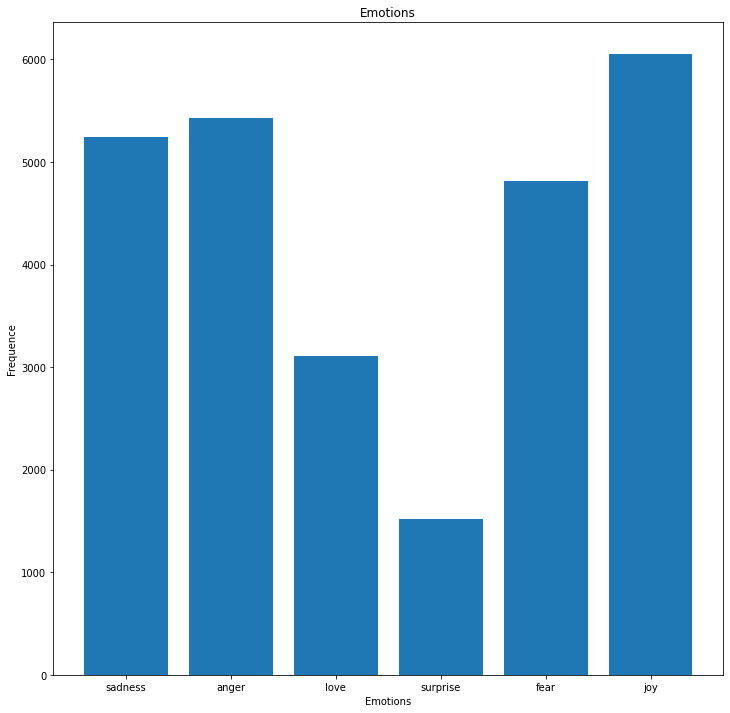

sad: 5247, anger: 5427, love: 3104, surprise: 1517, fear: 4813, joy: 6057


In [15]:

#nuvem de palavras base de dados 1
from matplotlib import pyplot as plt


figura = plt.figure(figsize=(12,12))
sadness = 0
anger = 0
love = 0
surprise = 0
fear = 0
joy = 0
for c in data['Emotion']:
     if c == "sadness":
          sadness += 1
     elif c == "anger":
          anger += 1
     elif c == "love":
          love += 1 
     elif c == "surprise":
          surprise += 1
     elif c == "fear":
          fear += 1
     elif c == "joy":
          joy += 1
     
#Grafico
plt.bar(["sadness", "anger", "love", "surprise", "fear", "joy"], [sadness, anger, love, surprise, fear, joy])
plt.title("Emotions")
plt.xlabel("Emotions")
plt.ylabel("Frequence")
plt.show() 
"""PROVA QUE OS DAODOS AFETAM DIRETAMENTE O RESULTADO DO ALGORITIMO
o que tem menos dados é o que ele mais errou"""
print(f"sad: {sadness}, anger: {anger}, love: {love}, surprise: {surprise}, fear: {fear}, joy: {joy}")

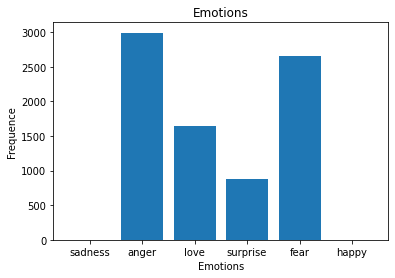

sad: 0, anger: 2993, love: 1641, surprise: 879, fear: 2652, happy: 0 


In [16]:
#nuvem de palavras
sadness = 0
anger = 0
love = 0
surprise = 0
fear = 0
happy = 0
for c in more_data['Emotion']:
     if c == "sadness":
          sadness += 1
     elif c == "anger":
          anger += 1
     elif c == "love":
          love += 1 
     elif c == "surprise":
          surprise += 1
     elif c == "fear":
          fear += 1
     elif c == "happy":
          happy += 1

#Grafico
plt.bar(["sadness", "anger", "love", "surprise", "fear", "happy"], [sadness, anger, love, surprise, fear, happy])
plt.title("Emotions")
plt.xlabel("Emotions")
plt.ylabel("Frequence")
plt.show() 
"""PROVA QUE OS DAODOS AFETAM DIRETAMENTE O RESULTADO DO ALGORITIMO
o que tem menos dados é o que ele mais errou"""
print(f"sad: {sadness}, anger: {anger}, love: {love}, surprise: {surprise}, fear: {fear}, happy: {happy} ")

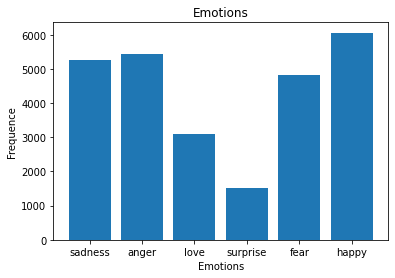

sad: 5247, anger: 5427, love: 3104, surprise: 1517, fear: 4813, happy: 6057 


In [17]:
#grafico data

#nuvem de palavras
sadness = 0
anger = 0
love = 0
surprise = 0
fear = 0
happy = 0
for c in data['Emotion']:
     if c == "sadness":
          sadness += 1
     elif c == "anger":
          anger += 1
     elif c == "love":
          love += 1 
     elif c == "surprise":
          surprise += 1
     elif c == "fear":
          fear += 1
     elif c == "joy":
          happy += 1

#Grafico
plt.bar(["sadness", "anger", "love", "surprise", "fear", "happy"], [sadness, anger, love, surprise, fear, happy])
plt.title("Emotions")
plt.xlabel("Emotions")
plt.ylabel("Frequence")
plt.show() 

print(f"sad: {sadness}, anger: {anger}, love: {love}, surprise: {surprise}, fear: {fear}, happy: {happy} ")

In [19]:
#atribue um nemero a cada str

cv = CountVectorizer()
vector = cv.fit(data['Text'])

dados_previsores_treinamento = treinamento.iloc[:, 0].values
classes_treinamento = treinamento.iloc[:, 1].values

dados_previsores_teste = teste.iloc[:, 0].values
classes_teste = teste.iloc[:, 1].values

dados_previsores_treinamento = vector.transform(dados_previsores_treinamento)
dados_previsores_teste = vector.transform(dados_previsores_teste)

def emotions(string,vector,model):
     vectorized = vector.transform([string])
     pred = model.predict(vectorized)
     return pred

In [20]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
variaveis_previsoras, classes = tl.fit_resample(dados_previsores_treinamento, classes_treinamento)


In [ ]:
 

#aplica a rede neural
from sklearn.neural_network import MLPClassifier

rede_neural = MLPClassifier(verbose=True, max_iter=1000, tol=0.00000000000001, hidden_layer_sizes=(100, 100, 100, 100, 100), random_state=0)

#treina a rede neural
rede_neural.fit(dados_previsores_treinamento, classes_treinamento)


#testa a rede neural
previsoes = rede_neural.predict(dados_previsores_teste)

#pontuação
pontuação = accuracy_score(classes_teste, previsoes)
print(pontuação)#0.9030573248407643


Iteration 1, loss = 1.14375911
Iteration 2, loss = 0.23245746
Iteration 3, loss = 0.07168926
Iteration 4, loss = 0.03233308
Iteration 5, loss = 0.02145314
Iteration 6, loss = 0.01946233
Iteration 7, loss = 0.01708839
Iteration 8, loss = 0.01627864
Iteration 9, loss = 0.01391580
Iteration 10, loss = 0.01712630
Iteration 11, loss = 0.02595465


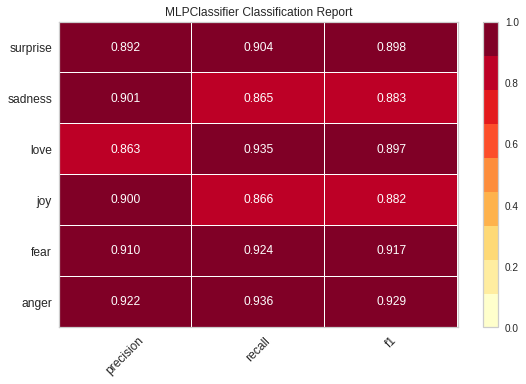

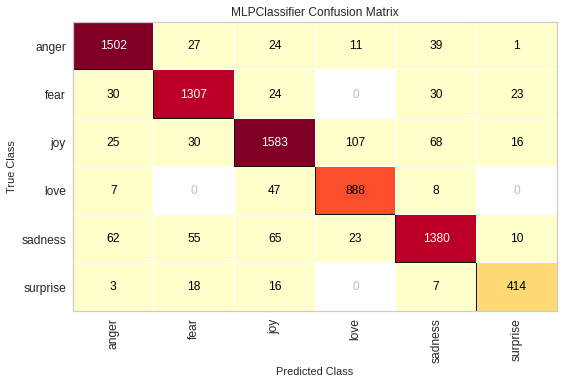

In [ ]:

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
cm = ClassificationReport(rede_neural)
cm.fit(dados_previsores_treinamento, classes_treinamento)
cm.score(dados_previsores_teste, classes_teste)
cm.poof()

#grafico da pontuação dele
cm2 = ConfusionMatrix(rede_neural)
cm2.fit(dados_previsores_treinamento, classes_treinamento)
cm2.score(dados_previsores_teste, classes_teste)
cm2.poof()

In [ ]:
#salva o modelo
import pickle
pickle.dump(rede_neural, open("nlp_emoções.pickle", "wb"))
pickle.dump(vector, open("transformador_nlp.pickle", "wb"))


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

variaveis_previsoras_aleatorias, classes_aleatórias = make_blobs(n_samples=200, centers=5, cluster_std=1.0)

grafico_dados = px.scatter(x=variaveis_previsoras_aleatorias[:, 0], y=variaveis_previsoras_aleatorias[:, 1])
grafico_dados.show()



kmeans = KMeans(n_clusters=5)
kmeans.fit(variaveis_previsoras_aleatorias)

previzões = kmeans.predict(variaveis_previsoras_aleatorias)

grafico_kmeans = px.scatter(x=variaveis_previsoras_aleatorias[:, 0], y=variaveis_previsoras_aleatorias[:, 1], color=previzões)
grafico_kmeans2 = px.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], size=[5, 5, 5, 5, 5], color='red')
grafico_kmeans3 = go.Figure(data=[grafico_kmeans, grafico_kmeans2])
grafico_kmeans3.show()

ValueError: ignored

# Nova seção